# SENTIMENT ANALYSIS ON AIRLINE CUSTOMER FEEDBACK

# 1- Details of dataset
The given file consists of 20 columns and 23171 rows.

Features of the Dataset:

Airline Name,
Overall Rating,
Review Title,
Review Date,
Verified (whether the review is verified or not)
Review,
Aircraft,
Type of Traveller,
Seat Type,
Route,
Date Flown,
Seat Comfort,
Cabin Staff Service,
Food & Beverages,
Ground Service,
Inflight Entertainment,
Wifi & Connectivity,
Value for Money,
Recommended.

This dataset contains valuable information that can be used to gain insights into customers' experiences with different airlines. By conducting sentiment analysis, we can discover hidden patterns, understand passenger sentiments, and make data-driven decisions to improve the overall airline experience. Let's explore this dataset and start an exciting journey of discovery!

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [45]:
# Load dataset
url = "https://raw.githubusercontent.com/Ibrahim-Maiga/Sentiment-Analysis-on-Airline-Reviews/main/Airline_review.csv"
df = pd.read_csv(url)

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [47]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [48]:
# Count distinct airline names
distinct_airline_count = df['Airline Name'].nunique()

print(f"Number of distinct airlines: {distinct_airline_count}")

Number of distinct airlines: 497


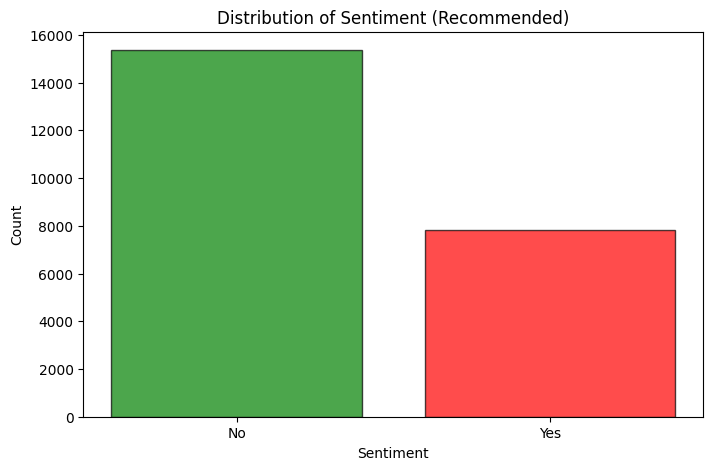

In [49]:
# Sentiment Distribution
# Plotting the distribution of sentiment (Recommended)
sentiment_counts = df['Recommended'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'], edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentiment (Recommended)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 2- Preprocessing steps

 - Load and Clean Data

-Drop all features except Review and Recommended.

-Remove null values.

-Remove non-alphabetic characters from the text and convert it to lowercase.

-Map sentiment labels yes to 1 and no to 0.

- Tokenization

-Use the Keras Tokenizer to tokenize and pad the text data.

- Split Data

-Use train_test_split to split the data into training and test sets.





In [50]:
# Preprocessing
df = df[['Airline Name', 'Review', 'Recommended']].dropna()
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})
df['Review'] = df['Review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x).lower())

In [51]:
df.head()

,Airline Name,Review,Recommended
0,AB Aviation,moroni to moheli turned out to be a pretty ...,1
1,AB Aviation,moroni to anjouan it is a very small airline...,0
2,AB Aviation,anjouan to dzaoudzi a very small airline an...,0
3,Adria Airways,please do a favor yourself and do not fly wi...,0
4,Adria Airways,do not book a flight with this airline my fr...,0


In [5]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Review'])
X = tokenizer.texts_to_sequences(df['Review'])
X = pad_sequences(X, maxlen=100)

In [6]:
# Split data
y = df['Recommended'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3- Model
### 3-1 Model designed from scratch

In [7]:
# Model design
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [8]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
232/232 [==============================] - 99s 404ms/step - loss: 0.4502 - accuracy: 0.8104 - val_loss: 0.4931 - val_accuracy: 0.7025
Epoch 2/10
232/232 [==============================] - 97s 417ms/step - loss: 0.2878 - accuracy: 0.8935 - val_loss: 0.3182 - val_accuracy: 0.8813
Epoch 3/10
232/232 [==============================] - 86s 373ms/step - loss: 0.2375 - accuracy: 0.9111 - val_loss: 0.3595 - val_accuracy: 0.8511
Epoch 4/10
232/232 [==============================] - 89s 384ms/step - loss: 0.2016 - accuracy: 0.9249 - val_loss: 0.4377 - val_accuracy: 0.8042
Epoch 5/10
232/232 [==============================] - 86s 369ms/step - loss: 0.1694 - accuracy: 0.9392 - val_loss: 0.3862 - val_accuracy: 0.8830
Epoch 6/10
232/232 [==============================] - 92s 395ms/step - loss: 0.1390 - accuracy: 0.9537 - val_loss: 0.3751 - val_accuracy: 0.8576
Epoch 7/10
232/232 [==============================] - 87s 376ms/step - loss: 0.1136 - accuracy: 0.9628 - val_loss: 0.4114 - val_ac

In [10]:
# Predict
y_pred = model.predict(X_test)

145/145 [==============================] - 12s 76ms/step


In [11]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

145/145 [==============================] - 11s 78ms/step - loss: 0.5018 - accuracy: 0.8479
Loss: 0.5017635822296143
Accuracy: 0.8478964567184448


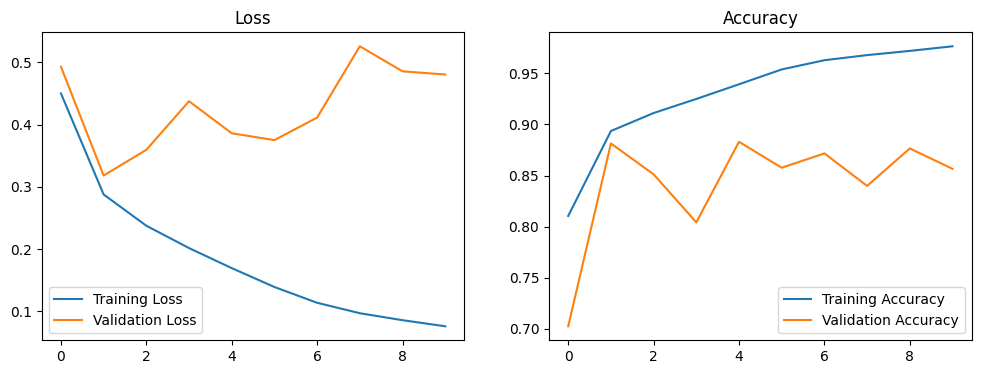

In [12]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# 4- Hyperparameter tuning

In [14]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [16]:
# Define Hyperparameter Space and Build Model Function
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

    for i in range(hp.Int('num_layers', 3, 8)):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32), return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('units_final', min_value=32, max_value=256, step=32)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_final', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [20]:
# Perform Random Search for Hyperparameter Tuning
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

    for i in range(hp.Int('num_layers', 3, 8)):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32), return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('units_final', min_value=32, max_value=256, step=32)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_final', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [21]:
# Perform Random Search for Hyperparameter Tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='hyperparameter_tuning',
    project_name='airline_review_sentiment'
)

tuner.search_space_summary()

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps


Trial 1 Complete [02h 18m 17s]
val_accuracy: 0.8766181170940399

Best val_accuracy So Far: 0.8766181170940399
Total elapsed time: 02h 18m 17s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
8                 |8                 |num_layers
224               |224               |units_0
0.5               |0.4               |dropout_0
128               |128               |units_1
0.1               |0.1               |dropout_1
96                |32                |units_2
0.5               |0.4               |dropout_2
96                |96                |units_final
0.1               |0.3               |dropout_final
0.0075272         |0.00031552        |learning_rate
224               |32                |units_3
0.1               |0.1               |dropout_3
32                |32                |units_4
0.1               |0.1               |dropout_4
224               |32                |units_5
0.2               |0.1               |dropout_5
32         

KeyboardInterrupt: 

### I stopped the hyperparameter tuning process during the second trial due to a lack of resources.

In [23]:
# Retrieve the best hyperparameters found so far
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [24]:
# Print the best hyperparameters
print("Best hyperparameters found so far:")
for key in best_hps.values.keys():
    print(f"{key}: {best_hps.get(key)}")

Best hyperparameters found so far:
num_layers: 8
units_0: 224
dropout_0: 0.4
units_1: 128
dropout_1: 0.1
units_2: 32
dropout_2: 0.4
units_final: 96
dropout_final: 0.30000000000000004
learning_rate: 0.00031551609441893605
units_3: 32
dropout_3: 0.1
units_4: 32
dropout_4: 0.1
units_5: 32
dropout_5: 0.1
units_6: 32
dropout_6: 0.1
units_7: 32
dropout_7: 0.1


In [25]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Save the model
best_model.save('best_model.h5')


Epoch 1/10
232/232 [==============================] - 394s 1s/step - loss: 0.7339 - accuracy: 0.5899 - val_loss: 0.8879 - val_accuracy: 0.3484
Epoch 2/10
232/232 [==============================] - 313s 1s/step - loss: 0.5442 - accuracy: 0.7470 - val_loss: 0.7967 - val_accuracy: 0.5143
Epoch 3/10
232/232 [==============================] - 284s 1s/step - loss: 0.4221 - accuracy: 0.8273 - val_loss: 0.5303 - val_accuracy: 0.7635
Epoch 4/10
232/232 [==============================] - 291s 1s/step - loss: 0.3672 - accuracy: 0.8600 - val_loss: 0.3558 - val_accuracy: 0.8625
Epoch 5/10
232/232 [==============================] - 306s 1s/step - loss: 0.3211 - accuracy: 0.8776 - val_loss: 0.3710 - val_accuracy: 0.8619
Epoch 6/10
232/232 [==============================] - 314s 1s/step - loss: 0.2815 - accuracy: 0.8976 - val_loss: 0.4386 - val_accuracy: 0.8306
Epoch 7/10
232/232 [==============================] - 310s 1s/step - loss: 0.2581 - accuracy: 0.9056 - val_loss: 1.3722 - val_accuracy: 0.4798

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test)

# Predict using the model
y_pred = best_model.predict(X_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

145/145 [==============================] - 41s 241ms/step
Test Loss: 0.38430801033973694
Test Accuracy: 0.8638619184494019


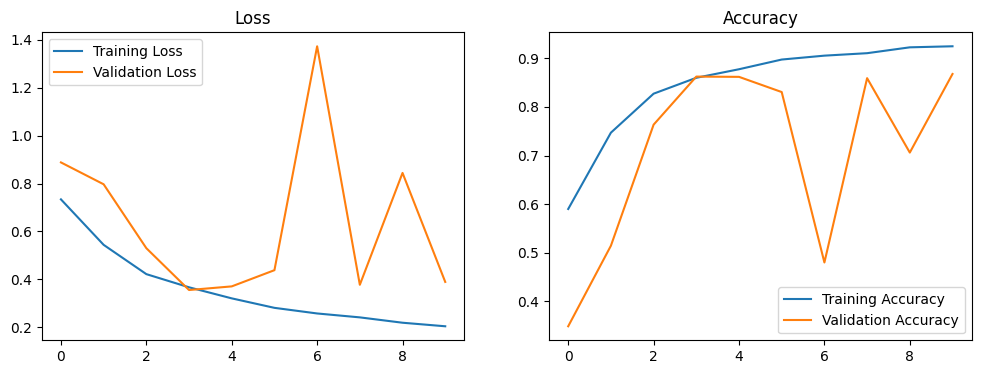

In [28]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

## Let's rank airlines based on the aggregated labels in the Recommended column, where 1 represents "yes" (recommended)

The table below shows the top 20 airlines ranked by the count of positive recommendations (yes=1):

In [55]:
# Group by 'Airline Name' and aggregate the sum of 'Recommended' column
airline_recommendations = df.groupby('Airline Name')['Recommended'].sum().reset_index()

# Rename the columns for better understanding
airline_recommendations.columns = ['Airline Name', 'Count of Recommended (yes=1)']

# Sort the airlines by the count of recommendations in descending order
ranked_airlines = airline_recommendations.sort_values(by='Count of Recommended (yes=1)', ascending=False).reset_index(drop=True)

# Display the ranked airlines
ranked_airlines.head(20)

,Airline Name,Count of Recommended (yes=1)
0,China Southern Airlines,98
1,Hainan Airlines,87
2,QantasLink,80
3,ANA All Nippon Airways,78
4,Garuda Indonesia,73
5,Air Astana,72
6,Bangkok Airways,72
7,Dragonair,72
8,Thai Smile Airways,70
9,Royal Brunei Airlines,69


# 5- Interpret your result
### Benchmarking analysis

Accuracy Improvement: The accuracy of the initial model was 84.79%, which increased to 86.39% after hyperparameter tuning. This 1.6% improvement demonstrates that tuning hyperparameters can enhance the model's ability to correctly classify customer reviews as positive or negative.

Loss Reduction: The loss value, which measures the model's prediction error, decreased from 0.5018 to 0.3843. A lower loss indicates that the model is making more accurate predictions. The reduction in loss suggests that the hyperparameter-tuned model is better at minimizing errors during training and evaluation.

High Customer Satisfaction: Airlines like China Southern Airlines, Hainan Airlines, and QantasLink have the highest number of positive recommendations. This suggests a high level of customer satisfaction with these airlines.

Regional Diversity: The list includes airlines from various regions, such as China (China Southern Airlines, Hainan Airlines), Japan (ANA All Nippon Airways, Japan Airlines), and Southeast Asia (Garuda Indonesia, Bangkok Airways, Thai Smile Airways). This diversity shows that high-quality service is recognized globally across different regions.


# 6- Used resources
Environment: Google Colab

Hardware: TPU V2

RAM: 2.79 GB

Disk: 27.47 GB

Using a TPU V2 on Google Colab, I leveraged the available hardware acceleration to speed up the training process, especially beneficial for deep learning tasks involving large datasets and complex models.

# 7- Future Work
Hyperparameter Optimization: Continue exploring other hyperparameter optimization techniques such as Grid Search, Bayesian Optimization, or Genetic Algorithms to potentially uncover even better configurations.

Data Augmentation: Implement data augmentation techniques to increase the diversity and size of the training data, which can help improve model generalization.

Explainability: Develop methods to interpret the model’s predictions, such as SHAP (SHapley Additive exPlanations) values, to gain insights into what features the model is focusing on.

Granular Analysis: Perform more granular analysis to understand the specific factors driving positive or negative sentiment. This could involve text analysis of the review content to extract common themes.

Improvement Strategies: Develop targeted strategies for airlines with lower rankings to help them improve their services based on identified weaknesses.

# 8- Lessons to learn
Hyperparameter Tuning: The improvement in model performance after hyperparameter tuning highlights the importance of this step in building robust machine learning models.

Model Evaluation: Regular evaluation and comparison of different models are crucial in understanding their strengths and weaknesses, guiding the development process.

Resource Management: Efficient use of computational resources, such as TPUs, can drastically reduce training times and enable the exploration of more complex models.

Customer Service Excellence: Airlines that consistently receive high recommendations often excel in areas such as customer service, in-flight experience, and punctuality. Other airlines can learn from their practices to improve their own services.

Importance of Reviews: Customer reviews are a valuable source of feedback and can significantly influence the reputation and perceived quality of an airline. Maintaining a high standard of service to garner positive reviews is crucial.

Benchmarking Against Competitors: Airlines can use this ranking to benchmark their services against competitors, identifying areas where they can improve or innovate.
